# **E-Commerce Sales Analysis Using SQL, Pandas, and GitHub**


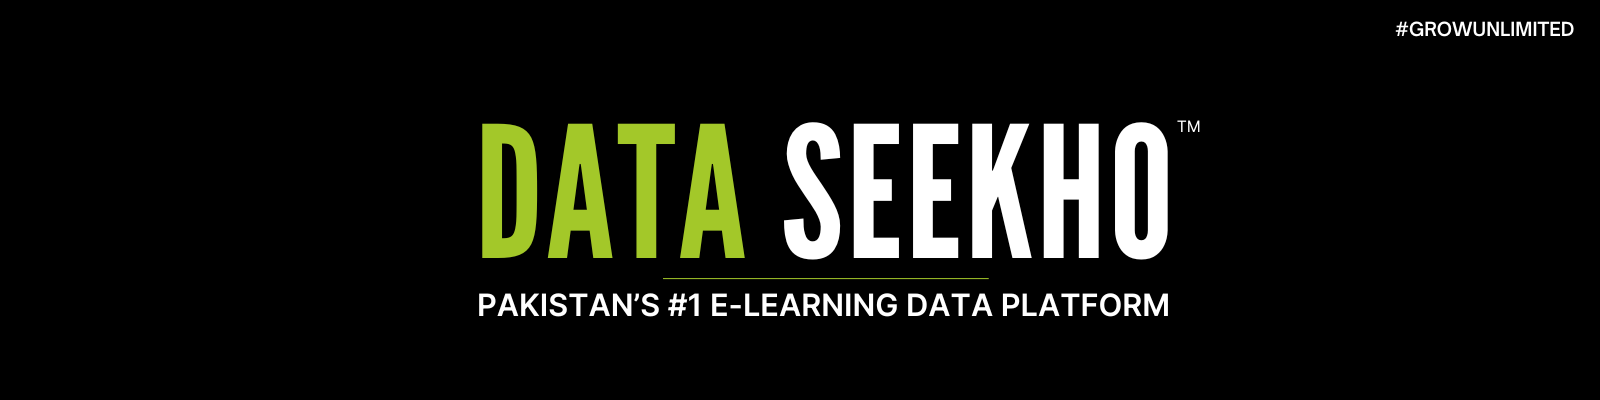

- **Asma Zahoor** is an aspiring data professional at **Data Seekho**.
- 📚 Learning **Python, SQL, Machine Learning**, and more through **Data Seekho’s** courses.
- 💻 Engaging in **hands-on projects** and learning from **industry experts**.
- 🌟 Part of **Data Seekho’s supportive community**, aiming for top 1% in data.
- 🎯 Preparing for a **successful career** in Data Science with **Data Seekho**.

 **Objective:** Develop a Sales Analysis Dashboard focusing on revenue, top products, customer segments, and sales trends.

 ## **Step 1: Import and Download Dataset**

In [2]:
# Import SQLite and Panda Libraries
import sqlite3
import pandas as pd

#Connect Database using SQLite
conn = sqlite3.connect('sales_data.db')

# create cursor to executle sql query on database
cursor = conn.cursor()

#Url of csv file
customer_url = "/content/drive/MyDrive/Customers_Large.csv"
product_url = "/content/drive/MyDrive/Products_Large.csv"
sales_url = "/content/drive/MyDrive/Sales_Large.csv"
order_url = "/content/drive/MyDrive/Orders_Large.csv"

# Read CSV file by panad
customer_file = pd.read_csv(customer_url)
product_file = pd.read_csv(product_url)
sales_file = pd.read_csv(sales_url)
order_file = pd.read_csv(order_url)


# Add/write data into sales_data database
customer_file.to_sql('customers', conn, if_exists='replace', index=False)
product_file.to_sql('products', conn, if_exists='replace', index=False)
sales_file.to_sql('sales', conn, if_exists='replace', index=False)
order_file.to_sql('orders', conn, if_exists='replace', index=False)

#Check database is created successfully
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('customers',), ('products',), ('sales',), ('orders',)]


## **Step 2: SQL Tasks**


### **1**. *Total Sales Reveneue by Month*



In [3]:
# sales reveneue by month
query = '''
SELECT strftime('%m', OrderDate) AS Month, SUM(TotalAmount) AS Total_Revenue
FROM Orders
GROUP BY Month
ORDER BY Month
'''
#print sales result
sales_revenue = pd.read_sql_query(query, conn)
print(sales_revenue)


   Month  Total_Revenue
0     01          23169
1     02          14671
2     03          20446
3     04          21664
4     05          30093
5     06          22289
6     07          24503
7     08          23733
8     09          21824
9     10          20679
10    11          19130
11    12          23476


### **2**. *Top 5 Best selling product*

In [4]:
# Top 5 best selling product
query = '''
SELECT products.ProductID, products.ProductName, SUM(Quantity) AS Total_Quantity
FROM orders
JOIN Products ON orders.ProductID = Products.ProductID
GROUP BY ProductName
ORDER BY Total_Quantity DESC
LIMIT 5
'''
#print result
top_product = pd.read_sql_query(query, conn)
print(top_product)

   ProductID ProductName  Total_Quantity
0        230      Notice             150
1        205        Card              99
2        220          We              96
3        216        Size              84
4        215        Both              81


### **3**. *Revenue contribution by customer segments*

In [5]:
# Revenue contribution by customer segment
query = '''
SELECT customers.Segment, SUM(orders.TotalAmount) AS Total_Revenue
FROM customers
JOIN orders ON customers.CustomerID = orders.CustomerID
GROUP BY customers.Segment
'''
#print result
segment_revenue = pd.read_sql_query(query, conn)
print(segment_revenue)

     Segment  Total_Revenue
0  Corporate         117980
1     Retail          73102
2  Wholesale          74595


### **4**. *Identify the top regions for sales*

In [6]:
# Top regions of sales
query = '''
SELECT customers.Region, SUM(orders.TotalAmount) AS Total_Revenue
FROM customers
JOIN orders ON customers.CustomerID = orders.CustomerID
GROUP BY customers.Region
ORDER BY Total_Revenue DESC
'''
#print result
region = pd.read_sql_query(query, conn)
print(region)

    Region  Total_Revenue
0     West          69494
1  Central          66744
2     East          58020
3    North          43118
4    South          28301


## **Step 3: Pandas Tasks**
**Objective:** Clean data, perform EDA, and create new columns.

**Export the SQL query results into CSV files.**

In [7]:
# Export sql results into CSV File
sales_revenue.to_csv('sales_revenue.csv', index=False)
top_product.to_csv('top_product.csv', index=False)
segment_revenue.to_csv('segment_revenue.csv', index=False)
region.to_csv('region.csv', index=False)

### **1**. *Clean Data:*
- Handle missing values.
- Remove duplicate rows.

**i. Handle missing values**

In [8]:
# HAndle missing data
customer_file.isnull().sum()

,0
CustomerID,0
Name,0
Region,0
Segment,0


In [9]:
order_file.isnull().sum()

,0
TransactionID,0
OrderDate,0
CustomerID,0
ProductID,0
Quantity,0
TotalAmount,0


In [10]:
sales_file.isnull().sum()

,0
OrderID,0
Revenue,0
Discounts,0
Taxes,0


In [11]:
product_file.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


**ii. Remove duplicate rows.**


In [12]:
customer_file.duplicated().sum()

0

In [13]:
order_file.duplicated().sum()

0

In [14]:
product_file.duplicated().sum()

0

In [15]:
sales_file.duplicated().sum()

0

### **2**. *EDA:*
- Analyze sales trends, customer behaviors, and product performance.

**Sales Trend**

In [16]:
# Analyze sales trend
order_file['OrderDate'] = pd.to_datetime(order_file['OrderDate'])
order_file['Month'] = order_file['OrderDate'].dt.month
order_file['Year'] = order_file['OrderDate'].dt.year
monthly_sales = order_file.groupby(['Month'])['TotalAmount'].sum().reset_index()
monthly_sales.rename(columns={'TotalAmount': 'Monthly_Sales'}, inplace=True)
print(monthly_sales)

    Month  Monthly_Sales
0       1          23169
1       2          14671
2       3          20446
3       4          21664
4       5          30093
5       6          22289
6       7          24503
7       8          23733
8       9          21824
9      10          20679
10     11          19130
11     12          23476


In [17]:
yearly_sales = order_file.groupby(['Year'])['TotalAmount'].sum().reset_index()
yearly_sales.rename(columns={'TotalAmount': 'Yearly_Sales'}, inplace=True)
print(yearly_sales)

   Year  Yearly_Sales
0  2022         16837
1  2023        129799
2  2024        119041


In [18]:
# Merge order and sales table
Sales_Order = pd.merge(order_file, sales_file, right_on='OrderID', left_on='TransactionID')
Sales_Order.head()


,TransactionID,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Month,Year,OrderID,Revenue,Discounts,Taxes
0,1000,2023-02-11,6,212,4,426,2,2023,1000,1755,30,65
1,1001,2024-06-09,22,226,8,184,6,2024,1001,1727,76,101
2,1002,2022-12-11,31,231,5,880,12,2022,1002,1834,25,23
3,1003,2022-12-18,23,227,10,928,12,2022,1003,896,94,123
4,1004,2024-04-11,42,215,7,517,4,2024,1004,1868,51,63


In [19]:
# Monthly and yearly sales Revenue
monthly_revenue = Sales_Order.groupby(['Month'])['Revenue'].sum().reset_index()
monthly_revenue.rename(columns={'Revenue': 'Monthly_Revenue'}, inplace=True)
print(monthly_revenue)



    Month  Monthly_Revenue
0       1            47011
1       2            32035
2       3            43038
3       4            45891
4       5            56438
5       6            41153
6       7            58094
7       8            50186
8       9            45754
9      10            50169
10     11            45717
11     12            48513


In [20]:
yearly_revenue = Sales_Order.groupby(['Year'])['Revenue'].sum().reset_index()
yearly_revenue.rename(columns={'Revenue': 'Yearly_Revenue'}, inplace=True)
print(yearly_revenue)

   Year  Yearly_Revenue
0  2022           38199
1  2023          273134
2  2024          252666


**Customer behavior**

In [21]:
# Customer behavior
customer_behavior = pd.merge( customer_file, order_file, right_on='CustomerID', left_on='CustomerID')
customer_behavior.head()



,CustomerID,Name,Region,Segment,TransactionID,OrderDate,ProductID,Quantity,TotalAmount,Month,Year
0,1,Christina Harrell,East,Corporate,1056,2024-07-19,211,5,540,7,2024
1,1,Christina Harrell,East,Corporate,1081,2024-11-14,250,9,547,11,2024
2,1,Christina Harrell,East,Corporate,1221,2023-01-23,221,6,617,1,2023
3,1,Christina Harrell,East,Corporate,1227,2023-06-20,219,7,343,6,2023
4,1,Christina Harrell,East,Corporate,1236,2024-08-20,220,9,419,8,2024


In [22]:
# revenue generated by different customer segment
segment_revenue = customer_behavior.groupby(['Segment'])['TotalAmount'].sum().reset_index()
segment_revenue.rename(columns={'TotalAmount': 'Segment_Revenue'}, inplace=True)
print(segment_revenue)

     Segment  Segment_Revenue
0  Corporate           117980
1     Retail            73102
2  Wholesale            74595


In [23]:
# highest buying product of each customer segment
segment_product = customer_behavior.groupby(['Segment', 'ProductID'])['Quantity'].sum().reset_index()
segment_product = segment_product.sort_values(by='Quantity', ascending=False)
segment_product = segment_product.drop_duplicates(subset='Segment')
print(segment_product)


       Segment  ProductID  Quantity
4    Corporate        205        60
56      Retail        207        53
124  Wholesale        230        43


In [24]:
customers =Sales_Order.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
print(customers.head(5))

CustomerID
3     22198
16    20717
27    18103
34    17155
10    17004
Name: Revenue, dtype: int64


In [25]:
# Region has large customers
region_customer = customer_behavior.groupby(['Region'])['CustomerID'].sum().sort_values(ascending=False)
print(region_customer)


Region
West       3123
East       2745
Central    2614
North      2610
South      1298
Name: CustomerID, dtype: int64


**Product performance**

In [26]:
# product performance
# hisghst product sales
product_sales = Sales_Order.groupby(['ProductID'])['Quantity'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity', ascending=False)
print(product_sales.head(5))

    ProductID  Quantity
4         205        99
19        220        96
6         207        88
15        216        84
14        215        81


In [27]:
#Merge product and order
product_order = pd.merge(product_file, order_file, right_on='ProductID', left_on='ProductID')
product_order.head(5)

,ProductID,ProductName,Category,Price,TransactionID,OrderDate,CustomerID,Quantity,TotalAmount,Month,Year
0,201,Shake,Electronics,226,1030,2023-05-20,21,8,859,5,2023
1,201,Shake,Electronics,226,1034,2024-10-05,47,1,624,10,2024
2,201,Shake,Electronics,226,1080,2023-01-14,10,8,390,1,2023
3,201,Shake,Electronics,226,1084,2024-05-14,49,4,431,5,2024
4,201,Shake,Electronics,226,1094,2023-02-09,34,10,359,2,2023


In [28]:
# highest product sale by name
product_name = product_order.groupby(['ProductName'])['Quantity'].sum().reset_index()
product_name = product_name.sort_values(by='Quantity', ascending=False)
print(product_name.head(5))

   ProductName  Quantity
29      Notice       150
5         Card        99
46          We        96
39        Size        84
4         Both        81


In [29]:
# product has highest sale region
product_region = product_order.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index()
product_region = product_region.sort_values(by='Quantity', ascending=False)
print(product_region.head(5))

           Category ProductName  Quantity
17            Books      Notice       150
36  Home Appliances        Card        99
35      Electronics          We        96
47  Home Appliances        Size        84
3       Accessories        Both        81


### **3**. *Feature Engineering:*
- Create new columns like revenue per product or customer lifetime value.

**Add new Columns**

In [30]:
# Add Revenue per product column in order
order_file['Revenue_per_product'] = product_order['Quantity'] * product_order['Price']
order_file.head(5)




,TransactionID,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Month,Year,Revenue_per_product
0,1000,2023-02-11,6,212,4,426,2,2023,1808.0
1,1001,2024-06-09,22,226,8,184,6,2024,226.0
2,1002,2022-12-11,31,231,5,880,12,2022,1808.0
3,1003,2022-12-18,23,227,10,928,12,2022,904.0
4,1004,2024-04-11,42,215,7,517,4,2024,2260.0


In [31]:
# Add customer lifetime value
customer_file['Customer_Lifetime_Value'] = order_file.groupby('CustomerID')['Revenue_per_product'].transform('sum')
customer_file.head(5)





,CustomerID,Name,Region,Segment,Customer_Lifetime_Value
0,1,Christina Harrell,East,Corporate,17178.0
1,2,David Charles,East,Corporate,12867.0
2,3,Cheryl Harris,East,Corporate,12986.0
3,4,Cameron King,Central,Corporate,11898.0
4,5,Tanya Kim,West,Corporate,17486.0


**Step 4: Basic Visualization Tasks**
- **Objective:** Create insightful visualizations using Matplotlib and Seaborn.


**a. Visualize monthly sales revenue.**

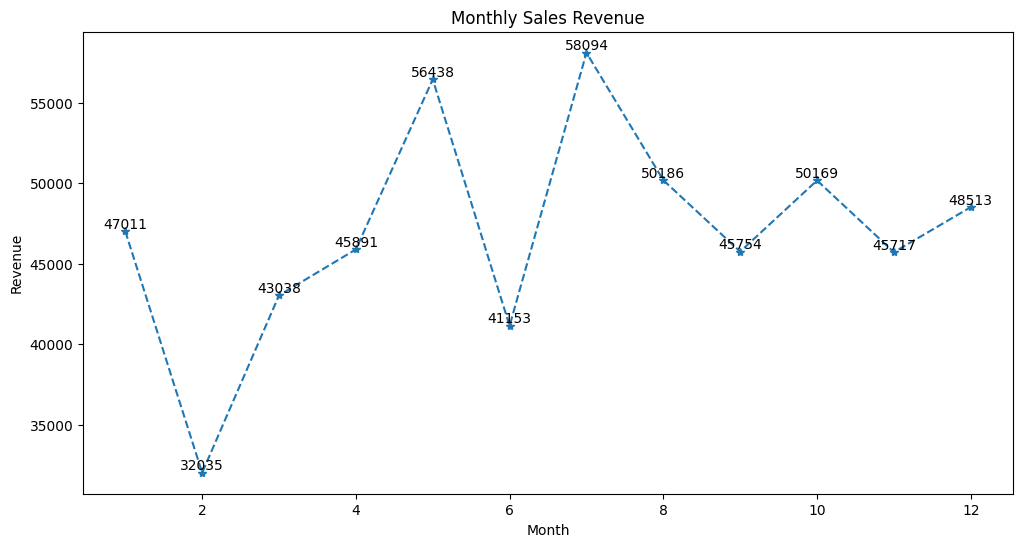

In [32]:
# Impport libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize monthly sales revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_revenue['Monthly_Revenue'], marker='*', linestyle='--')
plt.title('Monthly Sales Revenue' )
plt.xlabel('Month')
plt.ylabel('Revenue')
for x, y in zip(monthly_sales['Month'], monthly_revenue['Monthly_Revenue']):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()


**b. Show the top 5 products by sales quantity.**


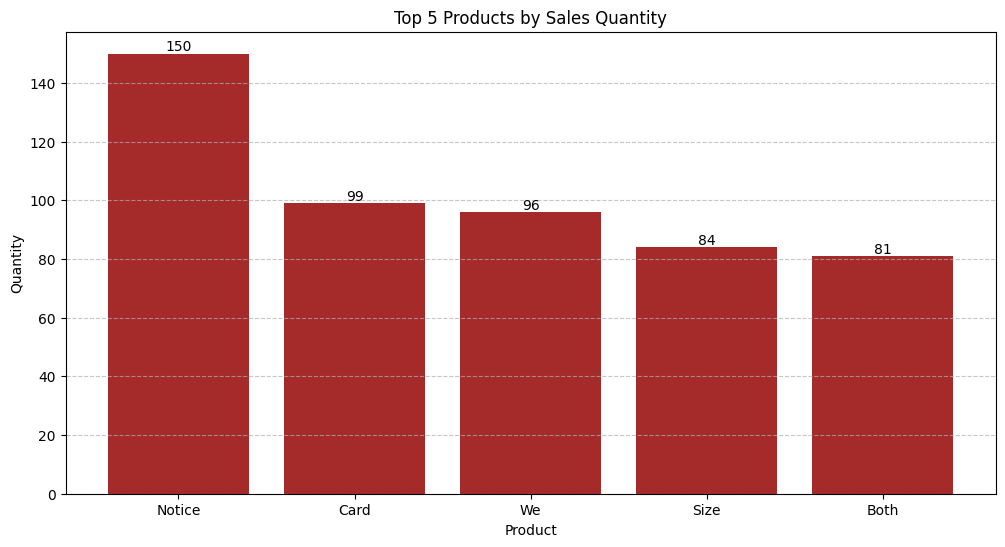

In [33]:
# Show the top 5 products by sales quantity.
plt.figure(figsize=(12, 6))
plt.bar(top_product['ProductName'], top_product['Total_Quantity'], color='brown')
plt.title('Top 5 Products by Sales Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for x, y in zip(top_product['ProductName'], top_product['Total_Quantity']):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()

**c. Display revenue contribution by customer segments and top regions.**

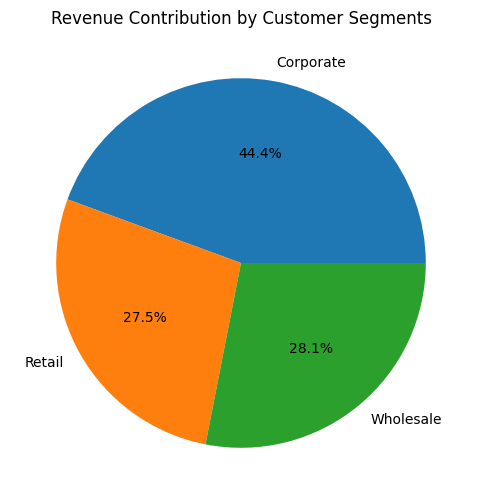

In [34]:
# Display revenue contribution by customer segments and top regions.
segment_revenue.columns
plt.figure(figsize=(12, 6))
plt.pie(segment_revenue['Segment_Revenue'], labels=segment_revenue['Segment'], autopct='%1.1f%%')
plt.title('Revenue Contribution by Customer Segments')
plt.show()



Index(['Region', 'Total_Revenue'], dtype='object')


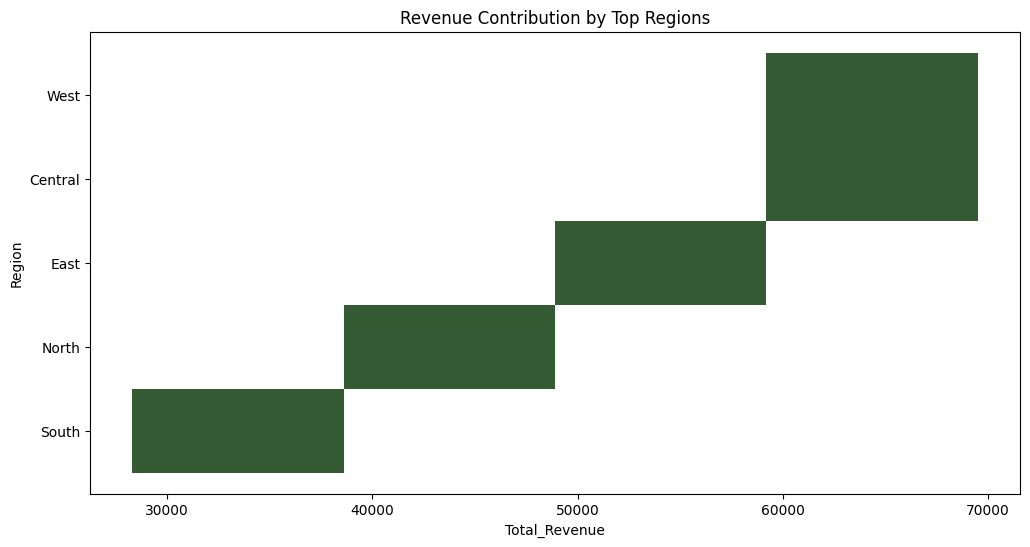

In [35]:
# Display revenue contribution by  top regions
print(region.columns)
plt.figure(figsize=(12, 6))
sns.histplot (y='Region', x='Total_Revenue', data=region, color = 'green')
plt.title('Revenue Contribution by Top Regions')
plt.xlabel('Total_Revenue')
plt.ylabel ('Region')
plt.show()